Reproducing the double descent with Gaussian matrices as a sanity check

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from VAMP_toolbox_clean import *
from math import isnan

In [2]:
# Gaussian sanity check, all i.i.d, generalization error as a function of the aspect ratio

n_exp = 50
asp_vec = np.linspace(0.5,3,n_exp) # aspec ratios 
E_vec = np.zeros(n_exp)
rho = 0.3  # sparsity parameter of the teacher
delta0 = 0.01
n,d = 200,100 # low dimension, still gives very good agreement with asymptotics
n_avg = 20 # choose the averaging number 

In [8]:
for i in range(n_exp):
    print((i+1)/n_exp*100,'%')
    for k in range(n_avg):  # 20 times averaging, solving the minimization problem with sklearn elastic net
        
            asp = asp_vec[i]
            n = int(asp*d)
            x0 = gauss_bernoulli(rho,d)
            F_train = np.random.normal(0,np.sqrt(1/n),(n,d))
            w = np.random.normal(0,np.sqrt(delta0),n)
            y_train = F_train@x0+w
            clf = linear_model.ElasticNet(alpha=0.001/n,l1_ratio=1,max_iter = 100000,tol = 0.00001)
            clf.fit(F_train,y_train)
            x_train = clf.coef_
            E_vec[i] = E_vec[i]+np.mean((x0-x_train)**2)
            
    E_vec[i] = 1/n_avg*E_vec[i]

2.0 %
4.0 %
6.0 %
8.0 %
10.0 %
12.0 %
14.000000000000002 %
16.0 %
18.0 %
20.0 %
22.0 %
24.0 %
26.0 %
28.000000000000004 %
30.0 %
32.0 %
34.0 %
36.0 %
38.0 %
40.0 %
42.0 %
44.0 %
46.0 %
48.0 %
50.0 %
52.0 %
54.0 %
56.00000000000001 %
57.99999999999999 %
60.0 %
62.0 %
64.0 %
66.0 %
68.0 %
70.0 %
72.0 %
74.0 %
76.0 %
78.0 %
80.0 %
82.0 %
84.0 %
86.0 %
88.0 %
90.0 %
92.0 %
94.0 %
96.0 %
98.0 %
100.0 %


In [6]:
# Gaussian sanity check, all i.i.d - Theory using SE asymptotics/Replica prediction

n_th = 51
asp_vec_th = np.linspace(0.5,3,n_th)
E_vec_th = np.zeros(n_th)
reg = 0.001
niter = 100
my_eps = 0

for i in range(n_th):
    print((i+1)/n_th*100,'%')
    asp = asp_vec_th[i]
    damp_se = 1
        
    alpha1_vec,alpha2_vec,eta1_vec,eta2_vec,gamma1_vec,gamma2_vec,E1_vec,E2_vec,tau1_vec,tau2_vec = VAMP_SE_l1_unif(asp,rho,delta0,reg,niter,damp_se,my_eps,0)
    
    V = 1/2*(1/eta1_vec[-1]+1/eta2_vec[-1])
    A1 = alpha1_vec[-1]/V
    A2 = alpha2_vec[-1]/V
    tau1 = tau1_vec[-1]
    tau2 = tau2_vec[-1]
    E = 1/2*(E1_vec[-1]+E2_vec[-1])
        
    while isnan(E) == True:
        print('restarting iteration')
        alpha1_vec,alpha2_vec,eta1_vec,eta2_vec,gamma1_vec,gamma2_vec,E1_vec,E2_vec,tau1_vec,tau2_vec = VAMP_SE_l1_unif(asp,rho,delta0,reg,niter,damp_se,my_eps,0)
        
        V = 1/2*(1/eta1_vec[-1]+1/eta2_vec[-1])
        A1 = alpha1_vec[-1]/V
        A2 = alpha2_vec[-1]/V
        tau1 = tau1_vec[-1]
        tau2 = tau2_vec[-1]
        E = 1/2*(E1_vec[-1]+E2_vec[-1])
        
        
    E_vec_th[i] = (E1_vec[-1]+E2_vec[-1])/2

1.9607843137254901 %
3.9215686274509802 %
5.88235294117647 %
7.8431372549019605 %
9.803921568627452 %
11.76470588235294 %
13.725490196078432 %
15.686274509803921 %
17.647058823529413 %
19.607843137254903 %
21.568627450980394 %
23.52941176470588 %
25.49019607843137 %
27.450980392156865 %
29.411764705882355 %
31.372549019607842 %
33.33333333333333 %
35.294117647058826 %
37.254901960784316 %
39.21568627450981 %
41.17647058823529 %
43.13725490196079 %
45.09803921568628 %
47.05882352941176 %
49.01960784313725 %
50.98039215686274 %
52.94117647058824 %
54.90196078431373 %
56.86274509803921 %
58.82352941176471 %
60.78431372549019 %
62.745098039215684 %
64.70588235294117 %
66.66666666666666 %
68.62745098039215 %
70.58823529411765 %
72.54901960784314 %
74.50980392156863 %
76.47058823529412 %
78.43137254901961 %
80.3921568627451 %
82.35294117647058 %
84.31372549019608 %
86.27450980392157 %
88.23529411764706 %
90.19607843137256 %
92.15686274509804 %
94.11764705882352 %
96.07843137254902 %
98.03921

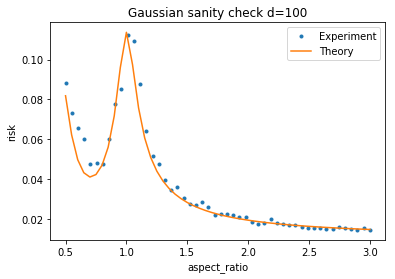

In [9]:
# Plot similar to all other papers on Gaussian double descent

plt.plot(asp_vec,E_vec,'.',label = 'Experiment')
plt.plot(asp_vec_th,E_vec_th, label = 'Theory')
plt.legend()
plt.title('Gaussian sanity check d=100')
plt.xlabel('aspect_ratio')
plt.ylabel('risk')
plt.savefig('sanity_check_Gaussian', dpi=500, quality = 95)